In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

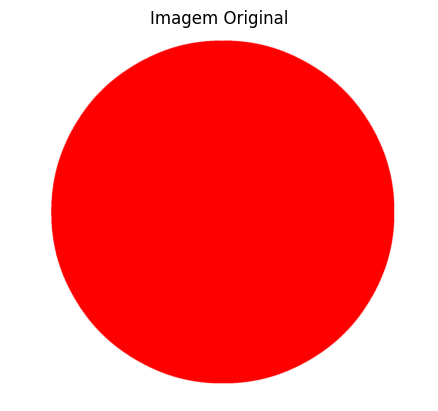

In [ ]:
# Caminho da imagem
img_path = 'Images/circulo.png'

# Carrega a imagem em BGR
img_bgr = cv2.imread(img_path)

# Converte para RGB para exibir corretamente no matplotlib
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Mostra a imagem original
plt.imshow(img_rgb)
plt.title("Imagem Original")
plt.axis('off')
plt.show()

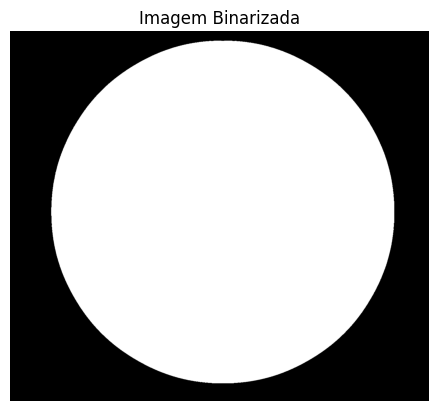

In [65]:
# Converter para escala de cinza
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Aplicar limiarização (binarização)
ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)

# Exibir imagem binarizada
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.title("Imagem Binarizada")
plt.axis('off')
plt.show()

Círculo detectado com circularidade: 0.85


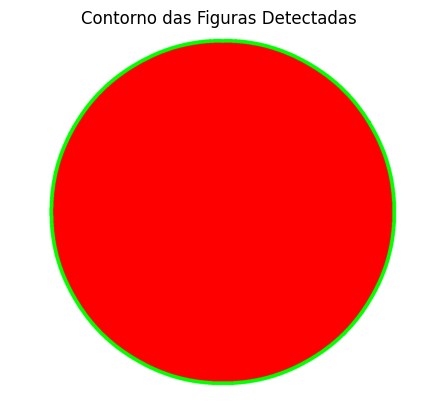

In [67]:
# Encontrar contornos
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copiar imagem original para desenhar os contornos
img_contours = img_rgb.copy()
cv2.drawContours(img_contours, contours, -1, (255, 0, 0), 20)

# Verificar circularidade
for cnt in contours:
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    
    if perimeter == 0:
        continue
    
    circularity = 4 * np.pi * (area / (perimeter ** 2))
    
    if circularity > 0.8:  # Ajuste esse valor conforme necessário
        print(f"Círculo detectado com circularidade: {circularity:.2f}")
        cv2.drawContours(img_contours, [cnt], -1, (0, 255, 0), 20)

# Exibir imagem com contornos detectados
plt.imshow(img_contours)
plt.title("Contorno das Figuras Detectadas")
plt.axis('off')
plt.show()